In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../CatchTheEye/')

In [3]:
import os

# A1 /  input

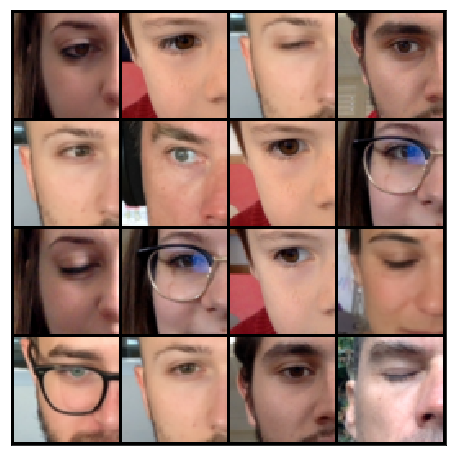

In [4]:
%matplotlib inline
from gaze import init, Data

args = init(batch_size=16, verbose=0, size_test_set=0)
#args.batch_size=16
d = Data(args)
fig, ax = d.show(nrow=4)
if True:
    fig.set_size_inches(8, 8)
    fig_dir = './'
    fig_ext = '.pdf'
    fig.savefig(os.path.join(fig_dir, 'dataset' + fig_ext),
            bbox_inches='tight', pad_inches=0)

In [5]:
from gaze import ML

ml = ML(args)
ml.device

device(type='cpu')

# A2 / architecture

https://github.com/davidstutz/latex-resources/blob/master/tikz-cnn/cnn.tex
    
  https://github.com/gwding/draw_convnet
  
  "This figure is generated by adapting the code from https://github.com/gwding/draw_convnet" 



Layer 0
Layer 1


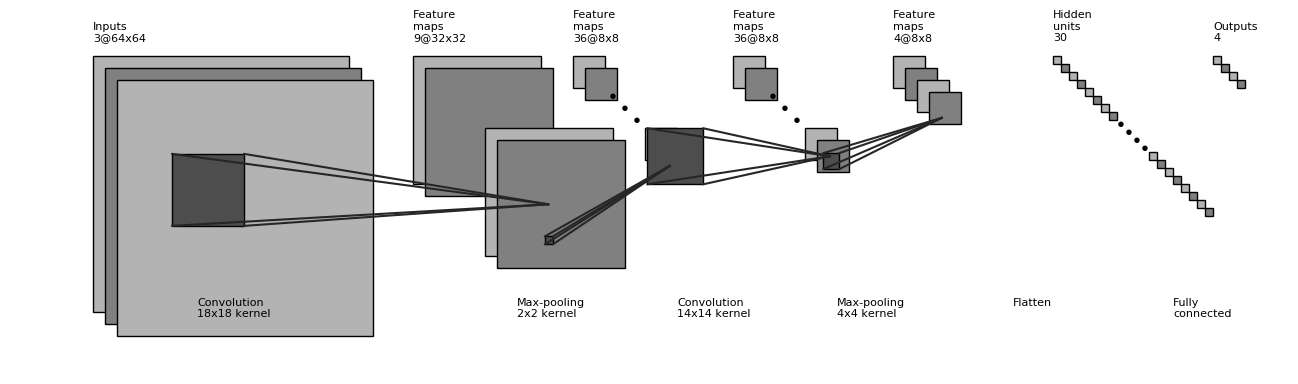

In [6]:
"""
Copyright (c) 2017, Gavin Weiguang Ding
All rights reserved.
Redistribution and use in source and binary forms, with or without
    modification, are permitted provided that the following conditions are met:
1. Redistributions of source code must retain the above copyright notice, this
    list of conditions and the following disclaimer.
2. Redistributions in binary form must reproduce the above copyright notice,
    this list of conditions and the following disclaimer in the documentation
    and/or other materials provided with the distribution.
3. Neither the name of the copyright holder nor the names of its contributors
    may be used to endorse or promote products derived from this software
    without specific prior written permission.
THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
    AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
    IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE
    ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE
    LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR
    CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF
    SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS
    INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN
    CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE)
    ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE
    POSSIBILITY OF SUCH DAMAGE.
"""


import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

NumDots = 4
NumConvMax = 8
NumFcMax = 20
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Darker = 0.15
Black = 0.


def add_layer(patches, colors, size=(24, 24), num=5,
              top_left=[0, 0],
              loc_diff=[3, -3],
              ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num):
        patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0]))
        if ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_layer_with_omission(patches, colors, size=(24, 24),
                            num=5, num_max=8,
                            num_dots=4,
                            top_left=[0, 0],
                            loc_diff=[3, -3],
                            ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    this_num = min(num, num_max)
    start_omit = (this_num - num_dots) // 2
    end_omit = this_num - start_omit
    start_omit -= 1
    for ind in range(this_num):
        if (num > num_max) and (start_omit < ind < end_omit):
            omit = True
        else:
            omit = False

        if omit:
            patches.append(
                Circle(loc_start + ind * loc_diff + np.array(size) / 2, 0.5))
        else:
            patches.append(Rectangle(loc_start + ind * loc_diff,
                                     size[1], size[0]))

        if omit:
            colors.append(Black)
        elif ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_mapping(patches, colors, start_ratio, end_ratio, patch_size, ind_bgn,
                top_left_list, loc_diff_list, num_show_list, size_list):

    start_loc = top_left_list[ind_bgn] \
        + (num_show_list[ind_bgn] - 1) * np.array(loc_diff_list[ind_bgn]) \
        + np.array([start_ratio[0] * (size_list[ind_bgn][1] - patch_size[1]),
                    - start_ratio[1] * (size_list[ind_bgn][0] - patch_size[0])]
                   )

    end_loc = top_left_list[ind_bgn + 1] \
        + (num_show_list[ind_bgn + 1] - 1) * np.array(
            loc_diff_list[ind_bgn + 1]) \
        + np.array([end_ratio[0] * size_list[ind_bgn + 1][1],
                    - end_ratio[1] * size_list[ind_bgn + 1][0]])


    patches.append(Rectangle(start_loc, patch_size[1], -patch_size[0]))
    colors.append(Dark)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]]))
    colors.append(Darker)


def label(xy, text, xy_off=[0, 4]):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text,
             family='sans-serif', size=8)


# MAIN
fc_unit_size = 2
layer_width = 40

flag_omit = False
flag_omit = True


patches = []
colors = []

fig, ax = plt.subplots(figsize=(16, 4))

############################
# conv layers
size_list = [(32, 32), (18, 18), (10, 10), (6, 6), (4, 4)]
num_list = [3, 32, 32, 48, 48]
size_list = [(64, 64), (32, 32), (8, 8), (8, 8), (8, 8)]
num_list = [3, 9, 36, 36, 4]


#x_diff_list = [0, layer_width, layer_width, layer_width, layer_width]
x_diff_list = [0]
x_diff_list.append(80)
for _ in num_list[2:]:
    x_diff_list.append(layer_width)


text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
loc_diff_list = [[3, -3]] * len(size_list)

num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

for ind in range(len(size_list)-1,-1,-1):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumConvMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list[ind],
                  num=num_show_list[ind],
                  top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
        num_list[ind], size_list[ind][0], size_list[ind][1]))


############################
# in between layers
start_ratio_list = [[0.3, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
start_ratio_list = [[0.3, 0.4], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]

end_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
patch_size_list = [(18, 18), (2, 2), (14, 14), (4, 4)]
ind_bgn_list = range(len(patch_size_list))
text_list = ['Convolution', 'Max-pooling', 'Convolution', 'Max-pooling']

for ind in range(len(patch_size_list)):
    add_mapping(
        patches, colors, start_ratio_list[ind], end_ratio_list[ind],
        patch_size_list[ind], ind,
        top_left_list, loc_diff_list, num_show_list, size_list)
    label(top_left_list[ind], text_list[ind] + '\n{}x{} kernel'.format(
        patch_size_list[ind][0], patch_size_list[ind][1]), xy_off=[26, -65]
    )


############################
# fully connected layers
num_list = [30, 4]
size_list = [(fc_unit_size, fc_unit_size)] * len(num_list)
num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

for ind in range(len(size_list)):
    print('Layer', ind)
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumFcMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list[ind],
                  num=num_show_list[ind],
                  top_left=top_left_list[ind],
                  loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}'.format(
        num_list[ind]))

text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected']

for ind in range(len(size_list)):
    label(top_left_list[ind], text_list[ind], xy_off=[-10, -65])

############################
for patch, color in zip(patches, colors):
    patch.set_color(color * np.ones(3))
    if isinstance(patch, Line2D):
        ax.add_line(patch)
    else:
        patch.set_edgecolor(Black * np.ones(3))
        ax.add_patch(patch)

#plt.tight_layout()
plt.axis('equal')
plt.axis('off')
plt.show()
#fig.set_size_inches(15, 8)

if True:
    fig_dir = './'
    fig_ext = '.pdf'
    fig.savefig(os.path.join(fig_dir, 'CNN' + fig_ext),
            bbox_inches='tight', pad_inches=0)

## parameter scan

In [58]:
output= """
--------------------------------------------------
 parameter scan : data
--------------------------------------------------
scanning over size = [32, 38, 45, 53, 64, 76, 90, 107, 128]
For parameter size = 53 ,  Accuracy=94.9% +/- 0.0%  in 697.4 seconds
For parameter size = 64 ,  Accuracy=94.9% +/- 0.0%  in 687.5 seconds
For parameter size = 76 ,  Accuracy=93.8% +/- 0.0%  in 720.4 seconds
For parameter size = 90 ,  Accuracy=95.5% +/- 0.0%  in 738.5 seconds
For parameter size = 107 ,  Accuracy=93.3% +/- 0.0%  in 764.6 seconds
For parameter size = 128 ,  Accuracy=91.6% +/- 0.0%  in 942.9 seconds
scanning over fullsize = [32, 38, 45, 53, 64, 76, 90, 107, 128]
For parameter fullsize = 32 ,  Accuracy=78.1% +/- 0.0%  in 674.7 seconds
For parameter fullsize = 38 ,  Accuracy=91.0% +/- 0.0%  in 677.7 seconds
For parameter fullsize = 45 ,  Accuracy=94.4% +/- 0.0%  in 680.2 seconds
For parameter fullsize = 53 ,  Accuracy=94.9% +/- 0.0%  in 683.6 seconds
For parameter fullsize = 64 ,  Accuracy=94.9% +/- 0.0%  in 687.5 seconds
For parameter fullsize = 76 ,  Accuracy=94.4% +/- 0.0%  in 692.8 seconds
For parameter fullsize = 90 ,  Accuracy=92.1% +/- 0.0%  in 699.4 seconds
For parameter fullsize = 107 ,  Accuracy=87.1% +/- 0.0%  in 709.4 seconds
For parameter fullsize = 128 ,  Accuracy=75.3% +/- 0.0%  in 721.8 seconds
scanning over crop = [32, 38, 45, 53, 64, 76, 90, 107, 128]
For parameter crop = 32 ,  Accuracy=63.5% +/- 0.0%  in 702.1 seconds
For parameter crop = 38 ,  Accuracy=79.2% +/- 0.0%  in 703.4 seconds
For parameter crop = 45 ,  Accuracy=92.1% +/- 0.0%  in 704.1 seconds
For parameter crop = 53 ,  Accuracy=93.8% +/- 0.0%  in 705.4 seconds
For parameter crop = 64 ,  Accuracy=94.9% +/- 0.0%  in 687.3 seconds
For parameter crop = 76 ,  Accuracy=94.4% +/- 0.0%  in 710.6 seconds
For parameter crop = 90 ,  Accuracy=94.9% +/- 0.0%  in 714.2 seconds
For parameter crop = 107 ,  Accuracy=93.8% +/- 0.0%  in 718.8 seconds
For parameter crop = 128 ,  Accuracy=91.6% +/- 0.0%  in 725.5 seconds
scanning over mean = [ 0.18        0.21405728  0.25455844  0.30272271  0.36        0.42811456
  0.50911688  0.60544542  0.72      ]
For parameter mean = 0.180 ,  Accuracy=63.1% +/- 0.0%  in 687.5 seconds
For parameter mean = 0.214 ,  Accuracy=70.6% +/- 0.0%  in 687.5 seconds
For parameter mean = 0.255 ,  Accuracy=87.1% +/- 0.0%  in 687.3 seconds
For parameter mean = 0.303 ,  Accuracy=92.7% +/- 0.0%  in 688.3 seconds
For parameter mean = 0.360 ,  Accuracy=94.9% +/- 0.0%  in 688.0 seconds
For parameter mean = 0.428 ,  Accuracy=96.1% +/- 0.0%  in 688.0 seconds
For parameter mean = 0.509 ,  Accuracy=94.9% +/- 0.0%  in 687.7 seconds
For parameter mean = 0.605 ,  Accuracy=95.5% +/- 0.0%  in 687.3 seconds
For parameter mean = 0.720 ,  Accuracy=94.4% +/- 0.0%  in 687.5 seconds
scanning over std = [ 0.15        0.17838107  0.21213203  0.25226892  0.3         0.35676213
  0.42426407  0.50453785  0.6       ]
For parameter std = 0.150 ,  Accuracy=94.9% +/- 0.0%  in 687.7 seconds
For parameter std = 0.178 ,  Accuracy=96.6% +/- 0.0%  in 687.4 seconds
For parameter std = 0.212 ,  Accuracy=93.3% +/- 0.0%  in 687.9 seconds
For parameter std = 0.252 ,  Accuracy=93.3% +/- 0.0%  in 687.9 seconds
For parameter std = 0.300 ,  Accuracy=94.9% +/- 0.0%  in 687.7 seconds
For parameter std = 0.357 ,  Accuracy=94.9% +/- 0.0%  in 687.8 seconds
For parameter std = 0.424 ,  Accuracy=96.6% +/- 0.0%  in 687.9 seconds
For parameter std = 0.505 ,  Accuracy=96.1% +/- 0.0%  in 688.0 seconds
For parameter std = 0.600 ,  Accuracy=95.5% +/- 0.0%  in 687.8 seconds
--------------------------------------------------
 parameter scan : network
--------------------------------------------------
scanning over conv1_kernel_size = [9, 10, 12, 15, 18, 21, 25, 30, 36]
For parameter conv1_kernel_size = 9 ,  Accuracy=93.8% +/- 0.0%  in 687.4 seconds
For parameter conv1_kernel_size = 10 ,  Accuracy=94.9% +/- 0.0%  in 687.1 seconds
For parameter conv1_kernel_size = 12 ,  Accuracy=94.9% +/- 0.0%  in 687.1 seconds
For parameter conv1_kernel_size = 15 ,  Accuracy=96.6% +/- 0.0%  in 687.6 seconds
For parameter conv1_kernel_size = 18 ,  Accuracy=94.9% +/- 0.0%  in 687.8 seconds
For parameter conv1_kernel_size = 21 ,  Accuracy=95.5% +/- 0.0%  in 687.6 seconds
For parameter conv1_kernel_size = 25 ,  Accuracy=94.9% +/- 0.0%  in 687.5 seconds
For parameter conv1_kernel_size = 30 ,  Accuracy=91.6% +/- 0.0%  in 687.5 seconds
scanning over conv1_dim = [4, 5, 6, 7, 9, 10, 12, 15, 18]
For parameter conv1_dim = 4 ,  Accuracy=93.3% +/- 0.0%  in 687.5 seconds
For parameter conv1_dim = 5 ,  Accuracy=94.9% +/- 0.0%  in 687.6 seconds
For parameter conv1_dim = 6 ,  Accuracy=93.8% +/- 0.0%  in 688.1 seconds
For parameter conv1_dim = 7 ,  Accuracy=94.9% +/- 0.0%  in 687.4 seconds
For parameter conv1_dim = 9 ,  Accuracy=94.9% +/- 0.0%  in 687.6 seconds
For parameter conv1_dim = 10 ,  Accuracy=95.5% +/- 0.0%  in 687.7 seconds
For parameter conv1_dim = 12 ,  Accuracy=94.4% +/- 0.0%  in 687.5 seconds
For parameter conv1_dim = 15 ,  Accuracy=93.3% +/- 0.0%  in 687.6 seconds
For parameter conv1_dim = 18 ,  Accuracy=94.9% +/- 0.0%  in 687.8 seconds
scanning over conv2_kernel_size = [7, 8, 9, 11, 14, 16, 19, 23, 28]
For parameter conv2_kernel_size = 7 ,  Accuracy=95.5% +/- 0.0%  in 687.4 seconds
For parameter conv2_kernel_size = 8 ,  Accuracy=95.5% +/- 0.0%  in 687.7 seconds
For parameter conv2_kernel_size = 9 ,  Accuracy=95.5% +/- 0.0%  in 687.0 seconds
For parameter conv2_kernel_size = 11 ,  Accuracy=96.1% +/- 0.0%  in 687.9 seconds
For parameter conv2_kernel_size = 14 ,  Accuracy=94.9% +/- 0.0%  in 687.7 seconds
For parameter conv2_kernel_size = 16 ,  Accuracy=94.4% +/- 0.0%  in 687.8 seconds
For parameter conv2_kernel_size = 19 ,  Accuracy=95.5% +/- 0.0%  in 687.6 seconds
scanning over conv2_dim = [18, 21, 25, 30, 36, 42, 50, 60, 72]
For parameter conv2_dim = 18 ,  Accuracy=94.4% +/- 0.0%  in 688.3 seconds
For parameter conv2_dim = 21 ,  Accuracy=95.5% +/- 0.0%  in 688.0 seconds
For parameter conv2_dim = 25 ,  Accuracy=94.4% +/- 0.0%  in 687.8 seconds
For parameter conv2_dim = 30 ,  Accuracy=94.4% +/- 0.0%  in 687.4 seconds
For parameter conv2_dim = 36 ,  Accuracy=94.9% +/- 0.0%  in 688.3 seconds
For parameter conv2_dim = 42 ,  Accuracy=95.5% +/- 0.0%  in 687.7 seconds
For parameter conv2_dim = 50 ,  Accuracy=94.9% +/- 0.0%  in 687.9 seconds
For parameter conv2_dim = 60 ,  Accuracy=94.9% +/- 0.0%  in 687.7 seconds
For parameter conv2_dim = 72 ,  Accuracy=94.4% +/- 0.0%  in 687.5 seconds
scanning over stride1 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
For parameter stride1 = 1 ,  Accuracy=91.0% +/- 0.0%  in 687.9 seconds
For parameter stride1 = 1 ,  Accuracy=91.0% +/- 0.0%  in 687.9 seconds
For parameter stride1 = 1 ,  Accuracy=91.0% +/- 0.0%  in 687.9 seconds
For parameter stride1 = 1 ,  Accuracy=91.0% +/- 0.0%  in 687.9 seconds
For parameter stride1 = 2 ,  Accuracy=94.9% +/- 0.0%  in 687.8 seconds
For parameter stride1 = 2 ,  Accuracy=94.9% +/- 0.0%  in 687.8 seconds
For parameter stride1 = 2 ,  Accuracy=94.9% +/- 0.0%  in 687.8 seconds
scanning over stride2 = [2, 2, 2, 3, 4, 4, 5, 6, 8]
For parameter stride2 = 2 ,  Accuracy=94.9% +/- 0.0%  in 688.3 seconds
For parameter stride2 = 2 ,  Accuracy=94.9% +/- 0.0%  in 688.3 seconds
For parameter stride2 = 2 ,  Accuracy=94.9% +/- 0.0%  in 688.3 seconds
For parameter stride2 = 3 ,  Accuracy=92.7% +/- 0.0%  in 687.5 seconds
For parameter stride2 = 4 ,  Accuracy=94.9% +/- 0.0%  in 687.7 seconds
For parameter stride2 = 4 ,  Accuracy=94.9% +/- 0.0%  in 687.7 seconds
For parameter stride2 = 5 ,  Accuracy=95.5% +/- 0.0%  in 687.5 seconds
For parameter stride2 = 6 ,  Accuracy=96.6% +/- 0.0%  in 687.7 seconds
For parameter stride2 = 8 ,  Accuracy=95.5% +/- 0.0%  in 687.3 seconds
scanning over dimension = [15, 17, 21, 25, 30, 35, 42, 50, 60]
For parameter dimension = 15 ,  Accuracy=93.8% +/- 0.0%  in 687.6 seconds
For parameter dimension = 17 ,  Accuracy=92.7% +/- 0.0%  in 687.2 seconds
For parameter dimension = 21 ,  Accuracy=96.6% +/- 0.0%  in 687.7 seconds
For parameter dimension = 25 ,  Accuracy=93.3% +/- 0.0%  in 687.6 seconds
For parameter dimension = 30 ,  Accuracy=94.9% +/- 0.0%  in 687.9 seconds
For parameter dimension = 35 ,  Accuracy=95.5% +/- 0.0%  in 687.6 seconds
For parameter dimension = 42 ,  Accuracy=96.1% +/- 0.0%  in 687.4 seconds
For parameter dimension = 50 ,  Accuracy=91.0% +/- 0.0%  in 688.0 seconds
For parameter dimension = 60 ,  Accuracy=94.4% +/- 0.0%  in 687.2 seconds
 parameter scan : learning
--------------------------------------------------
Using SGD
--------------------------------------------------
scanning over lr = [ 0.0125      0.01486509  0.01767767  0.02102241  0.025       0.02973018
  0.03535534  0.04204482  0.05      ]
For parameter lr = 0.013 ,  Accuracy=94.9% +/- 0.0%  in 687.8 seconds
For parameter lr = 0.015 ,  Accuracy=95.5% +/- 0.0%  in 687.8 seconds
For parameter lr = 0.018 ,  Accuracy=96.1% +/- 0.0%  in 687.3 seconds
For parameter lr = 0.021 ,  Accuracy=97.2% +/- 0.0%  in 687.5 seconds
For parameter lr = 0.025 ,  Accuracy=94.9% +/- 0.0%  in 688.0 seconds
For parameter lr = 0.030 ,  Accuracy=93.3% +/- 0.0%  in 687.7 seconds
For parameter lr = 0.035 ,  Accuracy=95.5% +/- 0.0%  in 687.7 seconds
For parameter lr = 0.042 ,  Accuracy=92.6% +/- 0.0%  in 687.8 seconds
For parameter lr = 0.050 ,  Accuracy=93.8% +/- 0.0%  in 687.5 seconds
scanning over momentum = [ 0.025       0.02973018  0.03535534  0.04204482  0.05        0.05946036
  0.07071068  0.08408964  0.1       ]
For parameter momentum = 0.025 ,  Accuracy=92.7% +/- 0.0%  in 687.1 seconds
For parameter momentum = 0.030 ,  Accuracy=94.4% +/- 0.0%  in 687.6 seconds
For parameter momentum = 0.035 ,  Accuracy=96.1% +/- 0.0%  in 687.6 seconds
For parameter momentum = 0.042 ,  Accuracy=94.9% +/- 0.0%  in 687.8 seconds
For parameter momentum = 0.050 ,  Accuracy=94.9% +/- 0.0%  in 687.5 seconds
For parameter momentum = 0.059 ,  Accuracy=93.8% +/- 0.0%  in 687.9 seconds
For parameter momentum = 0.071 ,  Accuracy=95.5% +/- 0.0%  in 687.8 seconds
For parameter momentum = 0.084 ,  Accuracy=96.1% +/- 0.0%  in 687.8 seconds
For parameter momentum = 0.100 ,  Accuracy=94.9% +/- 0.0%  in 687.7 seconds
scanning over batch_size = [4, 4, 5, 6, 8, 9, 11, 13, 16]
For parameter batch_size = 4 ,  Accuracy=95.5% +/- 0.0%  in 701.0 seconds
For parameter batch_size = 4 ,  Accuracy=95.5% +/- 0.0%  in 701.0 seconds
For parameter batch_size = 5 ,  Accuracy=94.4% +/- 0.0%  in 695.1 seconds
For parameter batch_size = 6 ,  Accuracy=95.5% +/- 0.0%  in 692.1 seconds
For parameter batch_size = 8 ,  Accuracy=94.9% +/- 0.0%  in 687.7 seconds
For parameter batch_size = 9 ,  Accuracy=94.9% +/- 0.0%  in 687.0 seconds
For parameter batch_size = 11 ,  Accuracy=96.6% +/- 0.0%  in 683.6 seconds
For parameter batch_size = 13 ,  Accuracy=93.8% +/- 0.0%  in 683.0 seconds
For parameter batch_size = 16 ,  Accuracy=95.5% +/- 0.0%  in 681.2 seconds
scanning over epochs = [10, 11, 14, 16, 20, 23, 28, 33, 40]
For parameter epochs = 10 ,  Accuracy=92.1% +/- 0.0%  in 349.4 seconds
For parameter epochs = 11 ,  Accuracy=86.5% +/- 0.0%  in 383.0 seconds
For parameter epochs = 14 ,  Accuracy=94.4% +/- 0.0%  in 484.6 seconds
For parameter epochs = 16 ,  Accuracy=94.4% +/- 0.0%  in 552.2 seconds
For parameter epochs = 20 ,  Accuracy=94.9% +/- 0.0%  in 687.9 seconds
For parameter epochs = 23 ,  Accuracy=94.9% +/- 0.0%  in 789.5 seconds
For parameter epochs = 28 ,  Accuracy=94.9% +/- 0.0%  in 958.1 seconds
For parameter epochs = 33 ,  Accuracy=94.9% +/- 0.0%  in 1127.1 seconds
For parameter epochs = 40 ,  Accuracy=94.9% +/- 0.0%  in 1365.2 seconds
"""

In [59]:
results = {}
for line in output.splitlines():
    #print('--->', line[:4])
    if line[:3] == 'For':
        line_ = line.split('For parameter ')[1]
        #print('--->', line_)
        parameter = line_.split(' = ')[0]
        value = line_.split(' = ')[1].split(' ,  ')[0]
        #print('--->', parameter, value)
        line__ = line.split('For parameter ')[1]
        accuracy = np.float(line__.split('Accuracy=')[1].split('%')[0])
        #print('--->', parameter, value, accuracy)
        try:
            _ = results[parameter]
        except:
            results[parameter] = {}
            results[parameter]['value'], results[parameter]['accuracy'] = [], []
        results[parameter]['value'].append(value)
        results[parameter]['accuracy'].append(accuracy)


results        

{'size': {'value': ['53', '64', '76', '90', '107', '128'],
  'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]},
 'fullsize': {'value': ['32',
   '38',
   '45',
   '53',
   '64',
   '76',
   '90',
   '107',
   '128'],
  'accuracy': [78.1, 91.0, 94.4, 94.9, 94.9, 94.4, 92.1, 87.1, 75.3]},
 'crop': {'value': ['32', '38', '45', '53', '64', '76', '90', '107', '128'],
  'accuracy': [63.5, 79.2, 92.1, 93.8, 94.9, 94.4, 94.9, 93.8, 91.6]},
 'mean': {'value': ['0.180',
   '0.214',
   '0.255',
   '0.303',
   '0.360',
   '0.428',
   '0.509',
   '0.605',
   '0.720'],
  'accuracy': [63.1, 70.6, 87.1, 92.7, 94.9, 96.1, 94.9, 95.5, 94.4]},
 'std': {'value': ['0.150',
   '0.178',
   '0.212',
   '0.252',
   '0.300',
   '0.357',
   '0.424',
   '0.505',
   '0.600'],
  'accuracy': [94.9, 96.6, 93.3, 93.3, 94.9, 94.9, 96.6, 96.1, 95.5]},
 'conv1_kernel_size': {'value': ['9',
   '10',
   '12',
   '15',
   '18',
   '21',
   '25',
   '30'],
  'accuracy': [93.8, 94.9, 94.9, 96.6, 94.9, 95.5, 94.9, 91.6]},
 'co

---> size {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


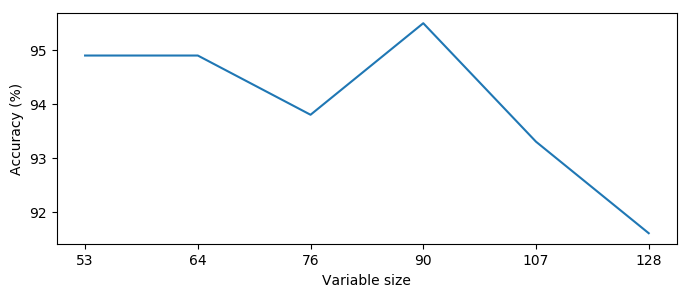

---> fullsize {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


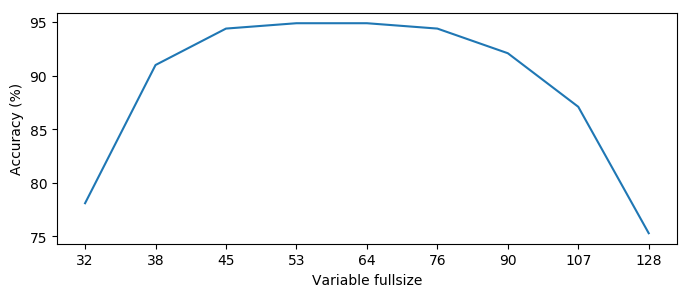

---> crop {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


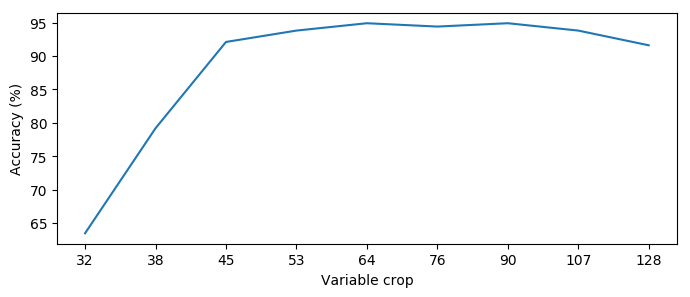

---> mean {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


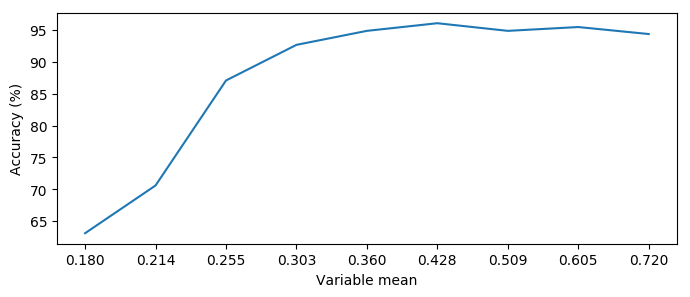

---> std {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


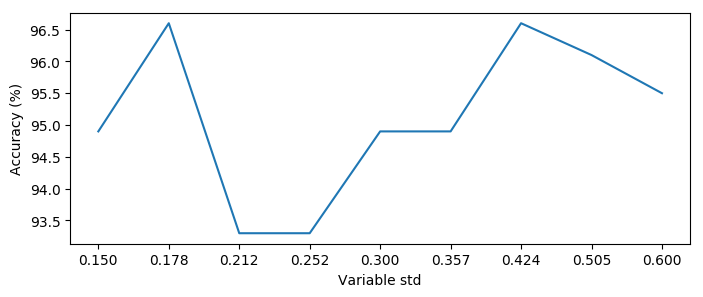

---> conv1_kernel_size {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


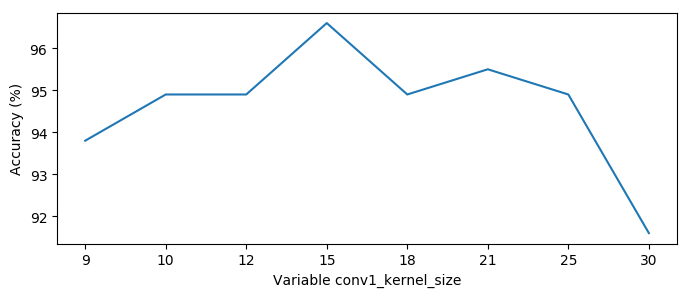

---> conv1_dim {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


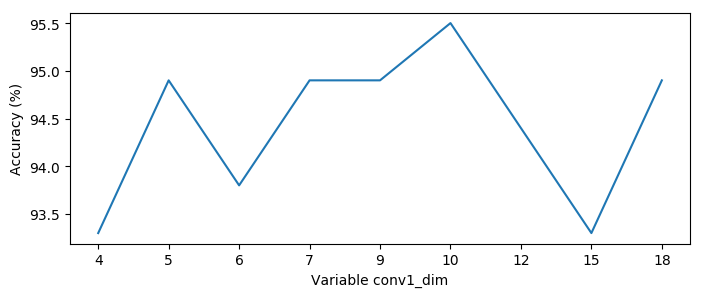

---> conv2_kernel_size {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


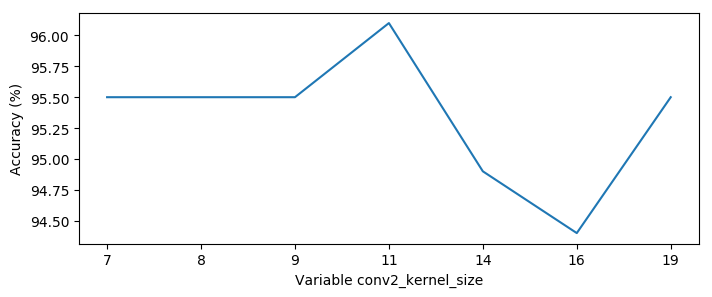

---> conv2_dim {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


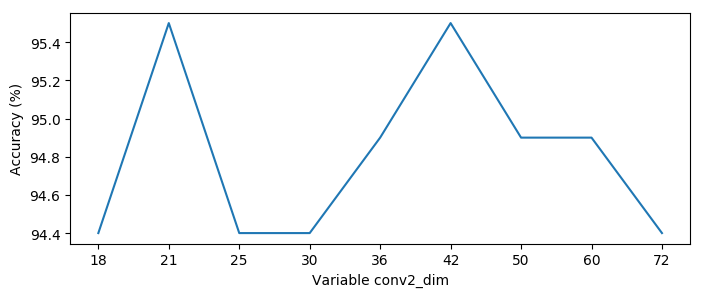

---> stride1 {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


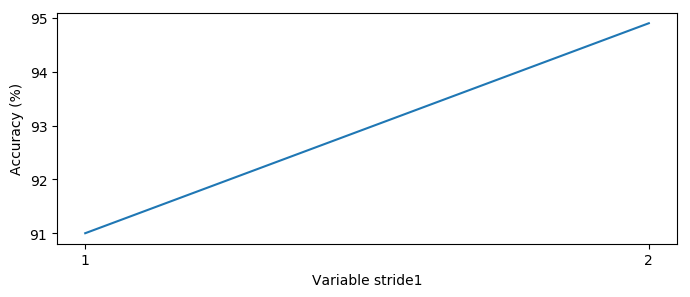

---> stride2 {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


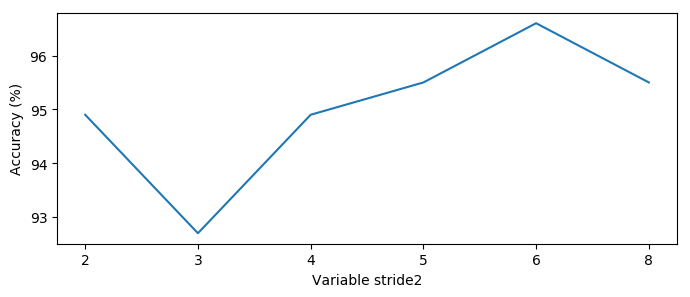

---> dimension {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


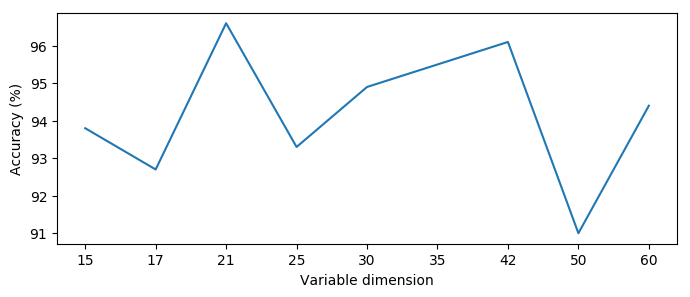

---> lr {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


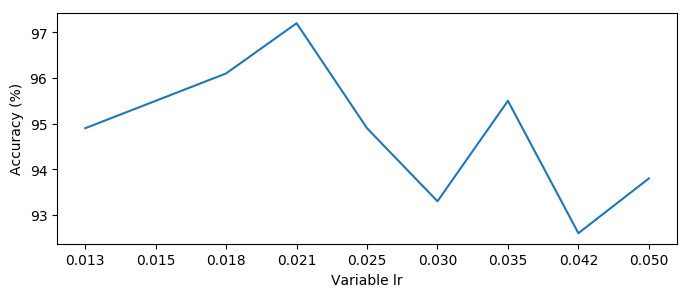

---> momentum {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


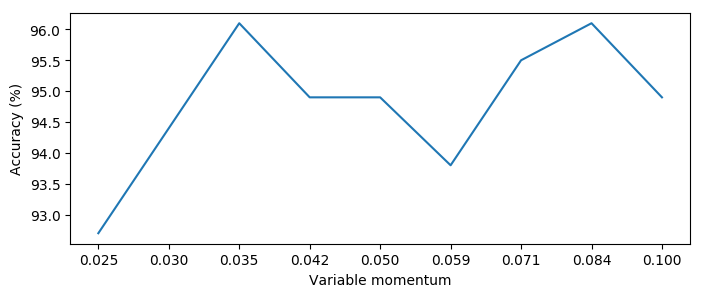

---> batch_size {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


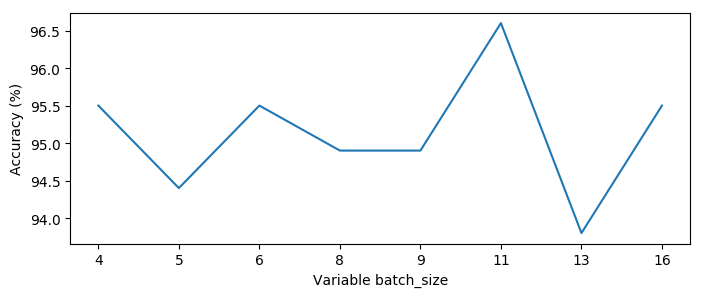

---> epochs {'value': ['53', '64', '76', '90', '107', '128'], 'accuracy': [94.9, 94.9, 93.8, 95.5, 93.3, 91.6]}


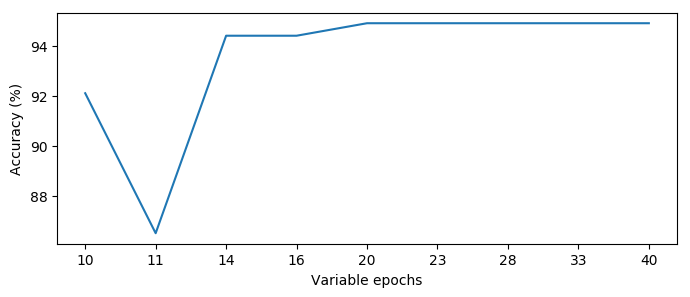

In [60]:

for parameter in results:
    print('--->',  parameter,  results[result])
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.plot(results[parameter]['value'], results[parameter]['accuracy'])
    plt.xlabel('Variable ' +  parameter)
    plt.ylabel('Accuracy (%)')

    plt.show()

In [65]:
100/15

6.666666666666667

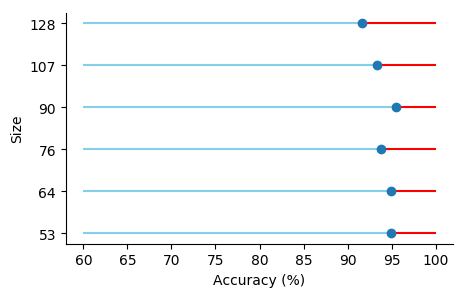

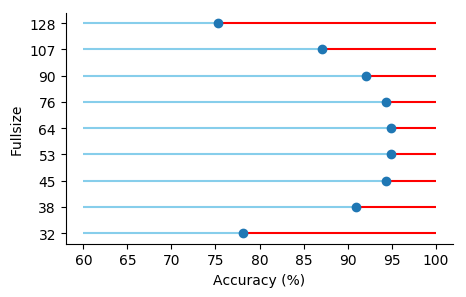

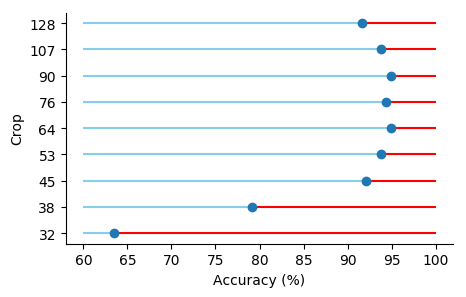

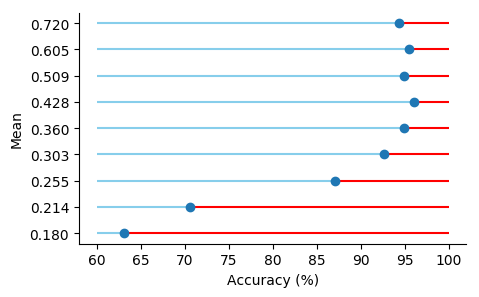

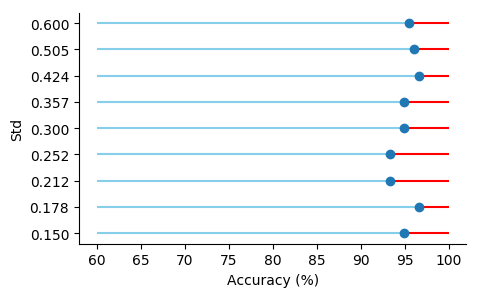

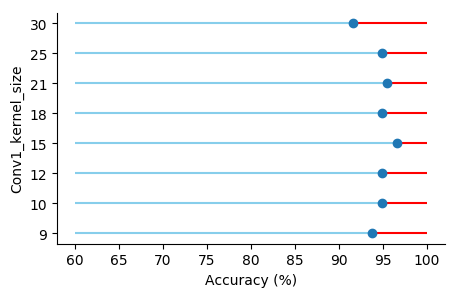

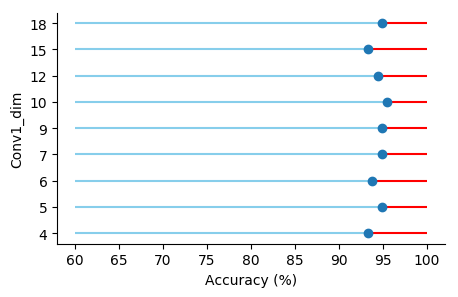

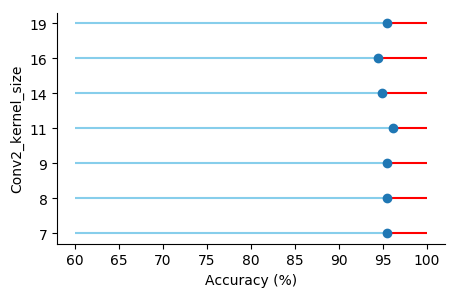

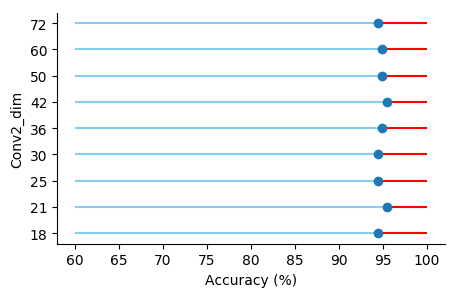

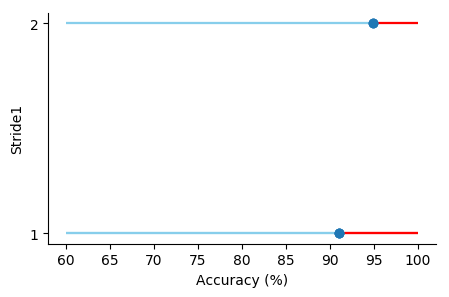

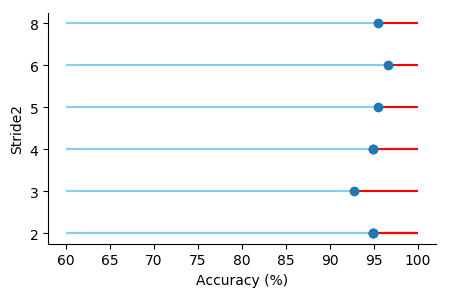

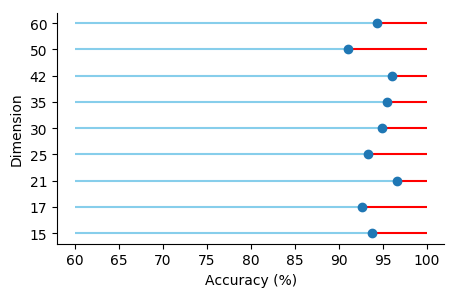

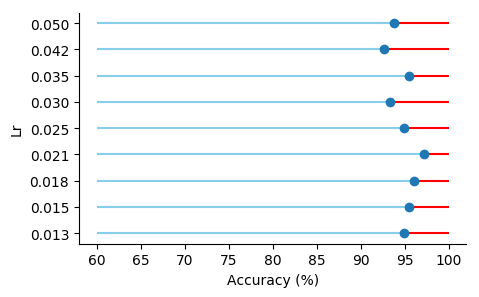

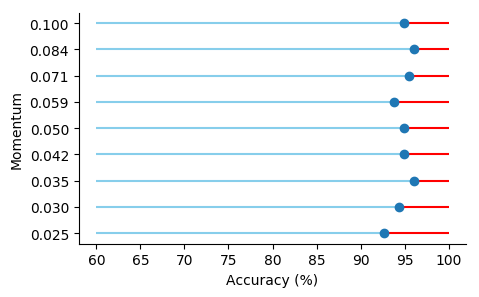

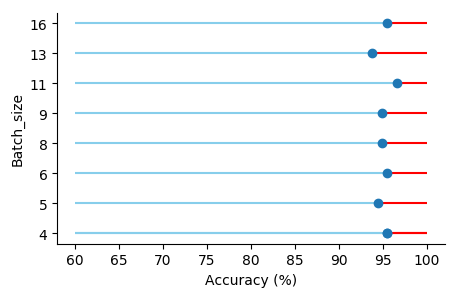

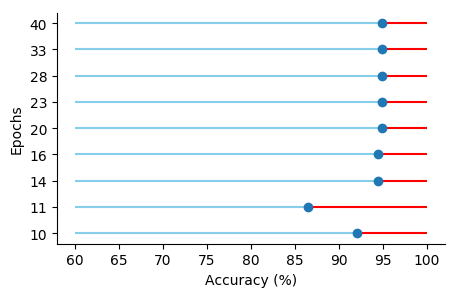

\includegraphics[width=.05\linewidth]{accuracy_size.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_fullsize.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_crop.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_mean.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_std.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_conv1_kernel_size.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_conv1_dim.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_conv2_kernel_size.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_conv2_dim.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_stride1.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_stride2.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_dimension.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_lr.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_momentum.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_batch_size.pdf} 
\includegraphics[width=.05\linewidth]{accuracy_epochs.pdf} 



In [67]:
tex = ''
for parameter in results:
    #print('--->',  parameter,  results[result])
    fig, ax = plt.subplots(figsize=(5, 3))
    #results[parameter]['accuracy'], results[parameter]['value'] = np.array(results[parameter]['accuracy']), np.array(results[parameter]['value'])
    ax.plot(results[parameter]['accuracy'], results[parameter]['value'], "o")
    ax.hlines(y=results[parameter]['value'], xmin=results[parameter]['accuracy'], xmax=100, color='red')
    ax.hlines(y=results[parameter]['value'], xmin=60, xmax=results[parameter]['accuracy'], color='skyblue')

    plt.ylabel(parameter.capitalize())
    #print( results[parameter]['value'] )
    #print( np.min([np.float(k) for k in results[parameter]['value']]))
    #ax.vlines(100, np.min(results[parameter]['value']), np.max(results[parameter]['value']), 'k', label='max')
    plt.xlabel('Accuracy (%)')
    # Only draw spine between the y-ticks
    #ax.spines['left'].set_bounds(-1, 1)
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()
    fig_dir = './'
    fig_ext = '.pdf'
    fname = 'accuracy_' + parameter + fig_ext
    tex += "\includegraphics[width=.05\linewidth]{"+ fname + "} \n"
    fig.savefig(os.path.join(fig_dir, fname),
            bbox_inches='tight', pad_inches=0)
print(tex)

In [22]:
result

'epochs'

## QRcode

In [7]:

url = 'https://invibe.net/LaurentPerrinet/Publications/Perrinet18gdr'
figname = os.path.join('./', 'GitQR.png')
if not os.path.isfile(figname):
    import pyqrcode as pq

    code = pq.create(url)
    code.png(figname, scale=5)
